In [1]:
from lcapy import *
from numpy import logspace
from numpy import linspace
 

## Q4
The following transfer function is out of control:$\frac{5s}{s^2-11s+5}$

Explain why the system is out of control, and describe what the shape of the step response would be.
Write out the transfer function Q(s) of a system with one negative feedback loop with a feedback transfer function of G(s).
Design the simplest feedback transfer function G(s) to make Q(s) stable.
What are the conditions on the constants of G(s) that will ensure that the system is in control?


In [2]:
H = transfer(5*s / (s**2-11*s+5))
H

     5⋅s     
─────────────
 2           
s  - 11⋅s + 5

In [3]:
H.poles()

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

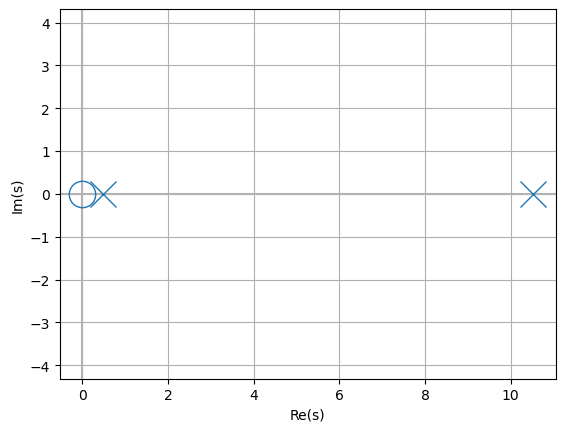

In [4]:
H.plot()

Both poles are on the RHP, so there will exponential growth.

In [5]:
F=H*1/s
ft=F(t)
ft
# The equation is:

  ⎛          ⎛11   √101⎞           ⎛√101   11⎞⎞     
  ⎜        t⋅⎜── - ────⎟         t⋅⎜──── + ──⎟⎟     
  ⎜          ⎝2     2  ⎠           ⎝ 2     2 ⎠⎟     
  ⎜  √101⋅ℯ                √101⋅ℯ             ⎟     
5⋅⎜- ─────────────────── + ───────────────────⎟⋅u(t)
  ⎝          101                   101        ⎠     

You did not have to find the equation, you just had to say exponential.  

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

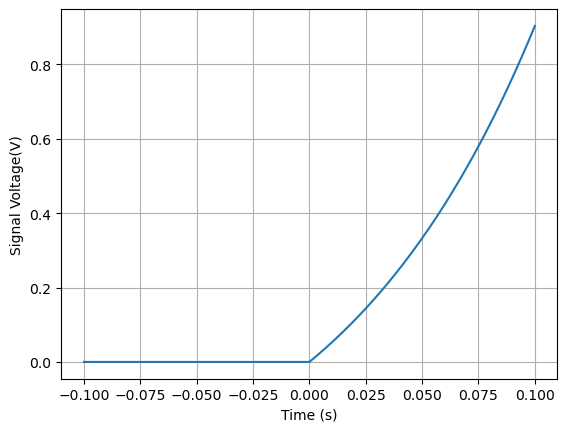

In [6]:
tv = linspace(-.1, .1, 400)
ft.plot(tv,ylabel='Signal Voltage(V)')

We can see the exponential growth clearly.

Below is the block diagram of Q(s):

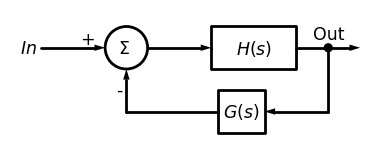

In [7]:
import schemdraw as schem
import schemdraw.elements as e
from schemdraw import dsp 
d = schem.Drawing()
a1=d.add(dsp.Arrow(l=d.unit/2).label('+', loc='right',ofst=(-.6, .2)).label('$In$', loc='left'))
sm = d.add(dsp.SumSigma())
a2=d.add(dsp.Arrow(l=d.unit/2))
delay1 = d.add(dsp.Box(w=2, h=1, label='$H(s)$', anchor='W'))
a3=d.add(dsp.Arrow('right', l=d.unit/2, xy=delay1.E,label='Out'))
#a4=d.add(dsp.Arrow(xy=sm.S, theta=-90,l=d.unit/2,reverse=True).label('-', loc='right',ofst=(.6, .2)))
d.add(dsp.Dot(xy=a3.center))
l1=d.add(dsp.Line('down', xy=a3.center, l=.5*d.unit))
l2=d.add(dsp.Arrow('left', l=.5*d.unit))
g2 = d.add(dsp.Box(w=1.1, h=1, label='$G(s)$', anchor='E'))
l3=d.add(dsp.Line('left', tox=sm.S, xy=g2.W))
l4=d.add(dsp.Arrow('up', toy=sm.S,label='-'))
d.draw()

In [8]:
from sympy import Symbol
#Keep G a symbol for now.
K1=Symbol('K1')
K2=Symbol('K2')
G = Symbol('G')
N=5
D=s**2-11*s+5
Q=N/(D+G*N)
Q.general()

         5         
───────────────────
       2           
5⋅G + s  - 11⋅s + 5

We need to create a positive $bs$ term. We need a $K_1s$ term that modifies $5$ into a $bs$ term.  

$$G(s)=K_1s$$

In [9]:
Q=Q.subs(G,K1*s)
Q=Q.expand()
Q

          5           
──────────────────────
          2           
5⋅K₁⋅s + s  - 11⋅s + 5

To make $5 K_1-11$ positve $K_1>\frac{11}{5}$

 $K_1=5$

In [10]:
Q=Q.subs(K1,5)
Q

      5      
─────────────
 2           
s  + 14⋅s + 5

In [11]:
Q.poles()

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

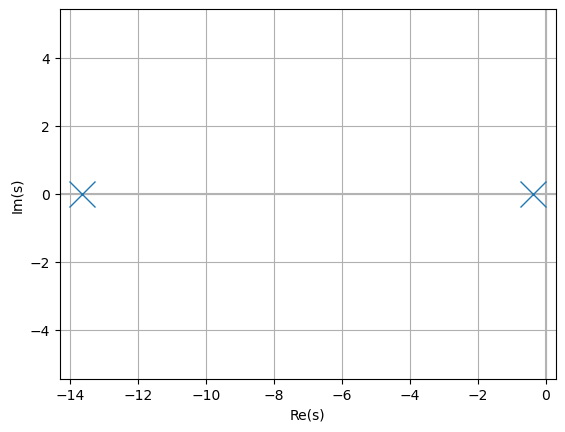

In [12]:
Q.plot()

The poles are too close to see, and too far apart to be labeled critically damped (repeated poles).

In [13]:
Fq=Q*1/s
qt=Fq(t,causal=True)
qt

  ⎛       t⋅(-7 - 2⋅√11)        t⋅(-7 + 2⋅√11)                          ⎞     
  ⎜  √11⋅ℯ                 √11⋅ℯ                            1           ⎟     
5⋅⎜- ─────────────────── + ─────────────────── + ───────────────────────⎟⋅u(t)
  ⎝    44⋅(-7 - 2⋅√11)       44⋅(-7 + 2⋅√11)     (7 - 2⋅√11)⋅(2⋅√11 + 7)⎠     

All the terms now have exponential decay.

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

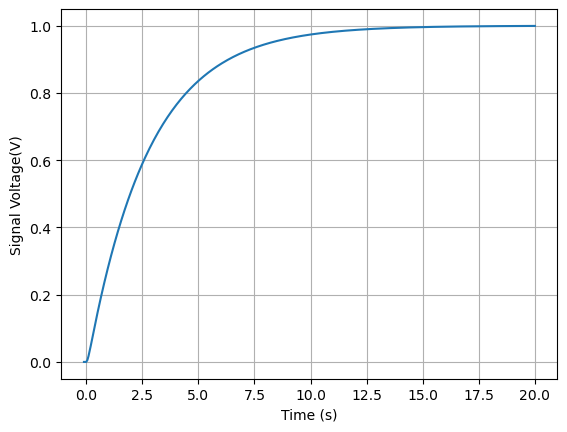

In [14]:
tv = linspace(-.1, 20, 400)
qt.plot(tv,ylabel='Signal Voltage(V)')

This is now the step response of a second order low pass filter.